In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### KNN for age prediction

In [30]:
df = pd.read_csv('latestdata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8051.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8978.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,201.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10115.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7079.0,NaN,NaN


In [32]:
df['age'].dtypes

dtype('O')

In [33]:
df.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude',
       'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials',
       'travel_history_binary'],
      dtype='object')

In [34]:
df.describe()

,latitude,longitude,admin_id
count,920688.000000,920688.000000,920688.000000
mean,44.270574,9.667676,6571.943791
std,15.467287,49.728425,4131.611894
min,-54.000000,-159.727596,1.000000
25%,41.402211,4.590656,1903.500000
50%,48.076205,10.552910,6363.000000
75%,52.580000,37.617300,10857.000000
max,70.071800,174.740000,11910.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920737 entries, 0 to 920736
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        920737 non-null  object 
 1   age                       243077 non-null  object 
 2   sex                       243783 non-null  object 
 3   city                      716290 non-null  object 
 4   province                  889612 non-null  object 
 5   country                   920634 non-null  object 
 6   latitude                  920688 non-null  float64
 7   longitude                 920688 non-null  float64
 8   geo_resolution            920688 non-null  object 
 9   date_onset_symptoms       164774 non-null  object 
 10  date_admission_hospital   2158 non-null    object 
 11  date_confirmation         919095 non-null  object 
 12  symptoms                  2053 non-null    object 
 13  lives_in_Wuhan            4342 non-null    o

In [36]:
df.drop(['date_onset_symptoms','ID','date_admission_hospital', 'date_confirmation', 'symptoms','travel_history_dates', 
         'travel_history_location','location', 'admin3', 'admin2', 'admin1','country_new', 'admin_id','outcome', 
         'data_moderator_initials','reported_market_exposure', 'additional_information','travel_history_binary',
         'chronic_disease','source','notes_for_discussion','sequence_available','lives_in_Wuhan','date_death_or_discharge','geo_resolution']
        ,axis = 1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920737 entries, 0 to 920736
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     243077 non-null  object 
 1   sex                     243783 non-null  object 
 2   city                    716290 non-null  object 
 3   province                889612 non-null  object 
 4   country                 920634 non-null  object 
 5   latitude                920688 non-null  float64
 6   longitude               920688 non-null  float64
 7   chronic_disease_binary  920737 non-null  bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 50.1+ MB


In [38]:
df.describe()

,latitude,longitude
count,920688.000000,920688.000000
mean,44.270574,9.667676
std,15.467287,49.728425
min,-54.000000,-159.727596
25%,41.402211,4.590656
50%,48.076205,10.552910
75%,52.580000,37.617300
max,70.071800,174.740000


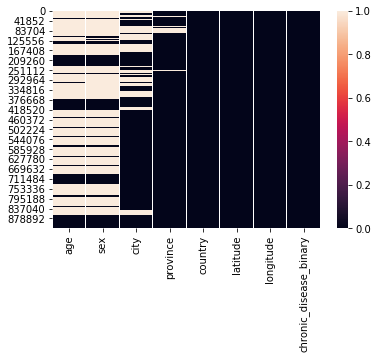

In [39]:
sns.heatmap(df.isnull())

In [40]:
df = df[df['city'].notna()]
df = df[df['province'].notna()]
df = df[df['country'].notna()]
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]
df = df[df['chronic_disease_binary'].notna()]

In [41]:
# plt.scatter(df['city'],df['chronic_disease_binary'])

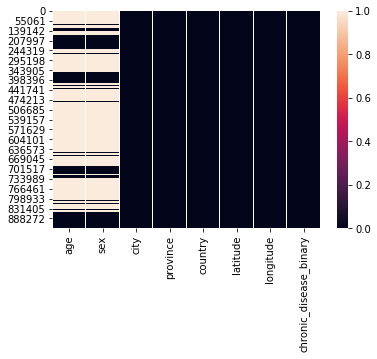

In [42]:
sns.heatmap(df.isnull())

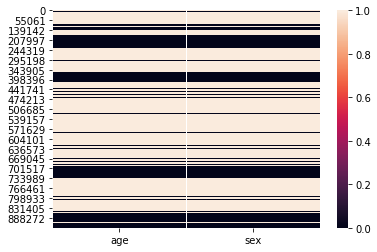

In [43]:
sns.heatmap(df[['age','sex']].isnull())

In [52]:
df['chronic_disease_binary']

0         False
1         False
3         False
4         False
5         False
          ...  
920732    False
920733    False
920734    False
920735    False
920736    False
Name: chronic_disease_binary, Length: 714377, dtype: bool

In [44]:
from sklearn.preprocessing import LabelEncoder

In [57]:
labelencoder = LabelEncoder()
df['city_num'] = labelencoder.fit_transform(df['city'])
df['provience_num'] = labelencoder.fit_transform(df['province'])
df['country_num'] = labelencoder.fit_transform(df['country'])
df['chronic_disease_binary_num'] = labelencoder.fit_transform(df['chronic_disease_binary'])


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


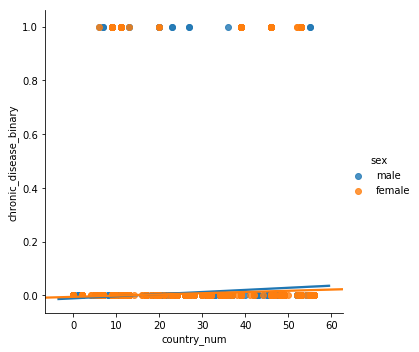

In [53]:
sns.lmplot(x='country_num', y = 'chronic_disease_binary', data=df,hue = 'sex')

In [60]:
df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'latitude', 'longitude',
       'chronic_disease_binary', 'city_num', 'provience_num', 'country_num',
       'chronic_disease_binary_num'],
      dtype='object')

In [64]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df[['city_num', 'provience_num', 'country_num','chronic_disease_binary_num']])

In [75]:
df['y_km'] = y_km

In [89]:
df_test = df.drop(['age', 'sex', 'city', 'province', 'country', 'chronic_disease_binary'],axis = 1 )

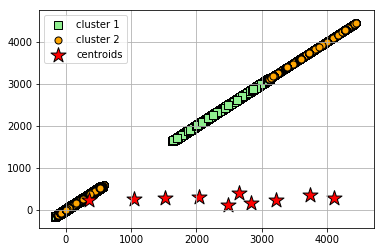

In [98]:
plt.scatter(
    df_test[y_km == 0], df_test[y_km == 0],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_test[y_km == 1], df_test[y_km == 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

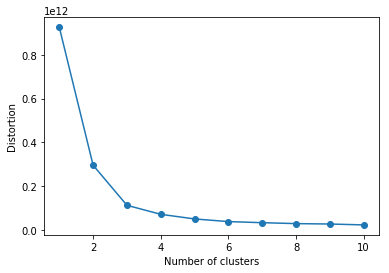

In [68]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df[['city_num', 'provience_num', 'country_num','chronic_disease_binary_num']])
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [6]:
age_null_df = df.loc[df['age'].isnull()]


In [7]:
age_null_df.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8051.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10115.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7079.0,NaN,NaN
5,000-1-10001,NaN,NaN,Yichun City,Jiangxi,China,28.307550,114.973200,admin2,NaN,...,NaN,NaN,NaN,NaN,Yichun City,Jiangxi,China,9818.0,NaN,NaN
6,000-1-10002,NaN,NaN,Shangrao City,Jiangxi,China,28.776930,117.469200,admin2,NaN,...,NaN,NaN,NaN,NaN,Shangrao City,Jiangxi,China,8004.0,NaN,NaN


In [8]:
age_df = df.loc[df['age'].isnull() == False]

In [32]:
import re

In [43]:
def preprocess_age(age):
    try:
        age = int(age)
    except:
        try:
            age_range = age.split('-')
#             print(age_range)
            age = int((int(age_range[0]) + int(age_range[1]))/2)
        except:
            try:
                age = int(float(age))
            except Exception as e:
                try:
                    age = int(re.findall('\d+', age)[0])
                except Exception as e:
                    print(str(e))
                    print(age)
    
    if age > 0 and age < 100:
        age = int(age)
    else:
        age = np.NAN
                    
    return age

In [44]:
age_df['age'].apply(lambda x : preprocess_age(x))

1         78.0
2         61.0
27        66.0
28        27.0
29        17.0
          ... 
920732    47.0
920733    47.0
920734    47.0
920735    47.0
920736    47.0
Name: age, Length: 243077, dtype: float64

In [45]:
age_df.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8978.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,201.0,NaN,NaN
27,000-1-10021,66,male,"Zhenlai County, Baicheng City",Jilin,China,45.948140,123.439600,admin3,NaN,...,NaN,https://www.google.com/maps/place/Zhenlai+Coun...,NaN,Zhenlai County,Baicheng City,Jilin,China,10120.0,NaN,NaN
28,000-1-10022,27,female,"Longshan District, Liaoyuan City",Jilin,China,42.858020,125.152100,admin3,NaN,...,NaN,NaN,NaN,Longshan District,Liaoyuan City,Jilin,China,5694.0,NaN,NaN
29,000-1-10023,17,male,"Gongzhuling City, Siping City",Jilin,China,43.783530,124.672900,admin3,NaN,...,NaN,NaN,NaN,Gongzhuling City,Siping City,Jilin,China,3653.0,NaN,NaN
